In [1]:
import numpy as np 
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
PC = pd.read_csv('/content/drive/MyDrive/Pharmaceuticals.csv',delimiter=',')
print(PC.head())

  Symbol                 Name  Market_Cap  Beta  PE_Ratio   ROE   ROA  \
0    ABT  Abbott Laboratories       68.44  0.32      24.7  26.4  11.8   
1    AGN       Allergan, Inc.        7.58  0.41      82.5  12.9   5.5   
2    AHM         Amersham plc        6.30  0.46      20.7  14.9   7.8   
3    AZN      AstraZeneca PLC       67.63  0.52      21.5  27.4  15.4   
4    AVE              Aventis       47.16  0.32      20.1  21.8   7.5   

   Asset_Turnover  Leverage  Rev_Growth  Net_Profit_Margin  \
0             0.7      0.42        7.54               16.1   
1             0.9      0.60        9.16                5.5   
2             0.9      0.27        7.05               11.2   
3             0.9      0.00       15.00               18.0   
4             0.6      0.34       26.81               12.9   

  Median_Recommendation Location Exchange  
0          Moderate Buy       US     NYSE  
1          Moderate Buy   CANADA     NYSE  
2            Strong Buy       UK     NYSE  
3         Mo

Q1)Use only the numerical variables (1 to 9) to cluster the 21 firms. Justify the various choices made in 
conducting the cluster analysis, such as weights for different variables, the specific clustering algorithm(s) 
used, the number of clusters formed, and so on. 

###Use only numerical variables (1 to 9 ) to cluster the 21 firms

In [4]:
columns_needed = PC[['Market_Cap', 'Beta', 'PE_Ratio', 'ROE', 'ROA',
       'Asset_Turnover', 'Leverage', 'Rev_Growth', 'Net_Profit_Margin']]
columns_needed.head()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
0,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1
1,7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5
2,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2
3,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0
4,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9


###Scaling all the quantitative variables in the dataframe

In [5]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(columns_needed.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['Market_Cap', 'Beta', 'PE_Ratio', 'ROE', 'ROA',
       'Asset_Turnover', 'Leverage', 'Rev_Growth', 'Net_Profit_Margin'])
 
print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
0,0.188642,-0.821041,-0.047867,0.041080,0.247579,-5.247542e-16,-0.217336,-0.540801,0.063205
1,-0.875518,-0.461835,3.583430,-0.875950,-0.965557,9.453132e-01,0.018736,-0.390551,-1.592035
2,-0.897899,-0.262277,-0.299168,-0.740094,-0.522666,9.453132e-01,-0.414062,-0.586247,-0.701953
3,0.174479,-0.022807,-0.248907,0.109009,0.940799,9.453132e-01,-0.768169,0.151089,0.359900
4,-0.183447,-0.821041,-0.336863,-0.271389,-0.580435,-4.726566e-01,-0.322256,1.246425,-0.436490


Using silhouette method to find the value of k

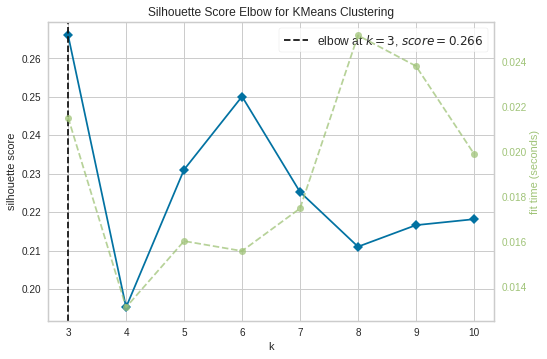

In [6]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(3,11),metric='silhouette', timings= True)
visualizer.fit(df_scaled)        # Fit the data to the visualizer
visualizer.show()      

###Fiting the data with 3 clusters

Using elbow method to find the best k value

In [7]:
import sklearn.cluster as cluster

In [8]:
K=range(3,11)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df_scaled)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [9]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,3,102.184786
1,4,84.538790
2,5,67.860519
3,6,53.035339
4,7,42.566323
5,8,35.911291
6,9,30.824969
7,10,24.639753


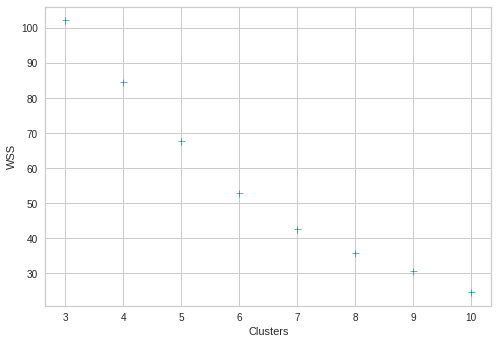

In [10]:
import seaborn as sns
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")

In [11]:
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

In [12]:
y_kmeans = kmeans.fit_predict(columns_needed)
y_kmeans

array([1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1, 2, 1],
      dtype=int32)

plotting the three clusters and their centroids

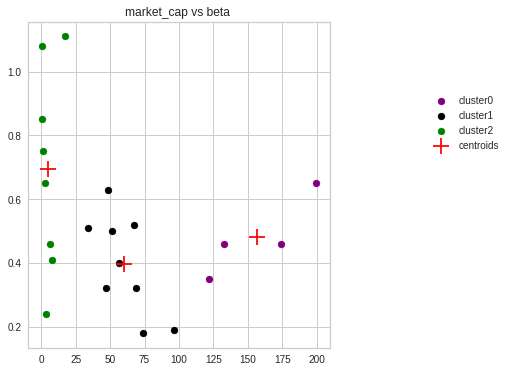

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[9,6])
ax = plt.subplot(111)
plt.scatter(columns_needed.Market_Cap[y_kmeans==0],columns_needed.Beta[y_kmeans==0],c='purple',label='cluster0')
plt.scatter(columns_needed.Market_Cap[y_kmeans==1],columns_needed.Beta[y_kmeans==1],c='black',label='cluster1')
plt.scatter(columns_needed.Market_Cap[y_kmeans==2],columns_needed.Beta[y_kmeans==2],c='green',label='cluster2')
#plt.scatter(data_for_clustering.Market_Cap[cluster_ids==3],data_for_clustering.Beta[cluster_ids==3],c='pink',label='cluster4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='+',c='red',s=250,label='centroids')
plt.title('market_cap vs beta ')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()


2Q)Interpret the clusters with respect to the numerical variables used in forming the clusters. 

In [14]:
y_kmeans = kmeans.fit_predict(columns_needed)
y_kmeans

array([1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1, 2, 1],
      dtype=int32)

CLUSTER 0:11,13,15,17

CLUSTER 1:1,4,5,7,10,16,18,19,21

CLUSTER 2:2,3,6,8,9,12,14,16,20

In [15]:
df_scaled[y_kmeans==0].describe()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,1.737454,-0.182453,-0.203359,1.265486,1.383690,1.181641,-0.479637,0.478716,0.605843
std,0.630844,0.497431,0.301141,0.966848,0.475071,0.610197,0.143669,0.646113,0.736567
min,1.127083,-0.701305,-0.468796,0.190522,0.863775,0.472657,-0.637018,-0.371075,-0.249104
25%,1.264124,-0.372034,-0.426389,0.801876,1.051522,0.827149,-0.578001,0.184014,0.195937
50%,1.671490,-0.262277,-0.264614,1.175481,1.393318,1.181641,-0.479637,0.578650,0.594132
75%,2.144819,-0.072696,-0.041584,1.639091,1.725486,1.536134,-0.381274,0.873352,1.004038
max,2.479752,0.496045,0.184586,2.520459,1.884349,1.890626,-0.322256,1.128637,1.484214


In [16]:
df_scaled[y_kmeans==1].describe()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.048021,-0.515051,-0.076487,0.136935,0.262556,-0.052517,-0.274168,-0.420952,0.391131
std,0.322844,0.622482,0.814750,0.818425,0.637039,0.686754,0.464013,0.836037,0.882378
min,-0.411806,-1.379804,-0.776639,-0.835193,-0.927045,-0.945313,-0.768169,-1.489598,-1.310956
25%,-0.165437,-0.821041,-0.412253,-0.271389,0.132042,-0.472657,-0.689479,-0.989694,0.063205
50%,-0.024679,-0.501747,-0.248907,0.041080,0.536421,-0.472657,-0.309141,-0.540801,0.359900
75%,0.188642,-0.062718,-0.047867,0.353550,0.574933,0.472657,-0.073070,0.151089,1.046981
max,0.681905,0.416222,1.949974,1.977034,0.940799,0.945313,0.700720,1.246425,1.531060


In [17]:
df_scaled[y_kmeans==2].describe()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,-0.922750,0.670659,0.187728,-0.786794,-0.987220,-0.531739,0.548257,0.234213,-0.742943
std,0.096213,1.255781,1.459814,0.432619,0.378104,1.084833,1.474265,1.265229,0.916743
min,-1.000888,-1.140334,-1.373478,-1.487304,-1.755058,-1.890626,-0.768169,-1.534116,-2.044884
25%,-0.988911,-0.312166,-0.372987,-1.008410,-1.081094,-1.181641,-0.437013,-0.601782,-1.357803
50%,-0.956825,0.695604,-0.132681,-0.808022,-0.975185,-0.472657,0.235135,-0.166568,-0.717568
75%,-0.892304,1.523771,0.164168,-0.619521,-0.715227,-0.118164,0.759738,1.493827,-0.303758
max,-0.712554,2.331983,3.583430,-0.115154,-0.522666,0.945313,3.835226,1.932750,0.875210


from the above three tables,

1)Market_cap: mean & std,
in cluster0 it is -0.84 & 0.32 
in cluster1 it is 0.69 & 0.94
in cluster2 it is -0.62 & 0.41 this gives us the idea that the companies in cluster 0 are having very low mean and variance interms of the market cap compared to cluster1 and cluster2 so from this column alone we can say that the companies in cluster1 are large companies cluster0 are small companies cluster2 are medium companies with respect to their market cap

2) Beta: mean & std,
in cluster0 it is 0.48 & 1.27 
in cluster1 it is -0.36 & 0.62
in cluster2 it is 0.27 & 1.37 from this data the companies in cluster1 is having a high mean value of beta and variance also which implies that these companies(in cluster1) are highly reactive to the changes in the market

3) PE_Ratio: mean & std,
in cluster0 it is -0.37 & 0.54 
in cluster1 it is -0.28 & 0.31
in cluster2 it is 1.34 & 1.77,from this data the variance among them are significant.
companies in cluster 1 are having the PE_Ratio close to the current average market value and investors are anticipating high growth in future.

4)ROE: mean & std,
in cluster0 it is -0.57 & 0.40 
in cluster1 it is 0.64 & 0.94
in cluster2 it is -0.98 & 0.33
from this data the companies in cluster2 are having a very low mean value and variance for ROE compared to cluster0 and cluster1.

5)ROA: mean & std
in cluster0 it is -0.85 & 0.23
in cluster1 it is 0.85 & 0.54
in cluster2 it is -1.04 & 0.515
from this data the companies in cluster2 are having a very low mean value and variance for ROA.

6)Asset_turnover: mean & std,
in cluster0 it is -1.02 & 0.69
in cluster1 it is 0.47 & 0.87
in cluster2 it is 0.23 & 0.81
from the above table it is clear that companies in cluster 1 turn their assets at a very fast pace.

7)Leverage: mean & std
in cluster0 it is 0.87 & 1.57
in cluster1 it is -0.34 & 0.43
in cluster2 it is 0.23 & 0.81
from this table we can find that cluster0 is having a high mean and std deviation of leverage compared to the other two clusters.
cluster0 are having a high mean value and std deviation of leverage value meaning companies in cluster0 are borrowing a lot of money compared to cluster1 and cluster2 and hence the stock price goes up.

8)Rev_Growth: mean & std
in cluster0 it is 0.93 & 1.00
in cluster1 it is -0.29 & 0.82
in cluster2 it is -0.58 & 0.70
"How much growth is reasonable? It depends on the company, the industry, and the economic situation. A growth rate of 10 percent a year, sustained over time, is remarkably good.cluster2 are having low mean value and std deviation compared to that of the other two clusters the growth in the companies which are in cluster2 are the least compared to that of the other two.

9)Net_profitmargin: mean & std
in cluster0 it is -0.34 & 0.71
in cluster1 it is 0.69 & 0.58
in cluster2 it is -1.41 & 0.56
from the above table the companies in cluster2 are having very low mean and variance compared to that of the other two columns.
"The net profit margin is equal to how much net income or profit is generated as a percentage of revenue"
Companies in cluster1 are making having less net_profit margin compared to the other two clusters.

3Q)Is there a pattern in the clusters with respect to the numerical variables (10 to 12)? (those not used in 
forming the clusters) 

In [18]:
PC[y_kmeans==0]

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
10,GSK,GlaxoSmithKline plc,122.11,0.35,18.0,62.9,20.3,1.0,0.34,21.87,21.1,Hold,UK,NYSE
12,JNJ,Johnson & Johnson,173.93,0.46,28.4,28.6,16.3,0.9,0.10,9.37,17.9,Moderate Buy,US,NYSE
14,MRK,"Merck & Co., Inc.",132.56,0.46,18.9,40.6,15.0,1.1,0.28,17.35,14.1,Hold,US,NYSE
16,PFE,Pfizer Inc,199.47,0.65,23.6,45.6,19.2,0.8,0.16,25.54,25.2,Moderate Buy,US,NYSE


the above table shows that the majority of the companies in this cluster are from location US and the exchange these companies are listed in is NYSE.The median_recommendation for this column has two values Moderate Buy and Hold

In [19]:
PC[y_kmeans==1]

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE
6,BMY,Bristol-Myers Squibb Company,51.33,0.50,13.9,34.8,15.1,0.9,0.57,2.70,20.6,Moderate Sell,US,NYSE
9,LLY,Eli Lilly and Company,73.84,0.18,27.9,31.0,13.5,0.6,0.53,6.21,23.4,Hold,US,NYSE
15,NVS,Novartis AG,96.65,0.19,21.6,17.9,11.2,0.5,0.06,-2.69,22.4,Hold,SWITZERLAND,NYSE
17,PHA,Pharmacia Corporation,56.24,0.40,56.5,13.5,5.7,0.6,0.35,15.00,7.3,Hold,US,NYSE
18,SGP,Schering-Plough Corporation,34.10,0.51,18.9,22.6,13.3,0.8,0.00,8.56,17.6,Hold,US,NYSE
20,WYE,Wyeth,48.19,0.63,13.1,54.9,13.4,0.6,1.12,0.36,25.5,Hold,US,NYSE


The above table shows that this cluster has all the companies listed in the NYSE and though there are several locations such as SWITZERLAND and UK the majority is US. There are two median recommendations for buy and sell each,with the rest as HOLD.

In [20]:
PC[y_kmeans==2]

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
5,BAY,Bayer AG,16.90,1.11,27.9,3.9,1.4,0.6,0.00,-3.17,2.6,Hold,GERMANY,NYSE
7,CHTT,"Chattem, Inc",0.41,0.85,26.0,24.1,4.3,0.6,3.51,6.38,7.5,Moderate Buy,US,NASDAQ
8,ELN,"Elan Corporation, plc",0.78,1.08,3.6,15.1,5.1,0.3,1.07,34.21,13.3,Moderate Sell,IRELAND,NYSE
11,IVX,IVAX Corporation,2.60,0.65,19.9,21.4,6.8,0.6,1.45,13.99,11.0,Hold,US,AMEX
13,MRX,Medicis Pharmaceutical Corporation,1.20,0.75,28.6,11.2,5.4,0.3,0.93,30.37,21.3,Moderate Buy,US,NYSE
19,WPI,"Watson Pharmaceuticals, Inc.",3.26,0.24,18.4,10.2,6.8,0.5,0.20,29.18,15.1,Moderate Sell,US,NYSE


The above table shows that this cluster has all the companies listed in the NYSE and though there are several locations such as CANADA,UK,GERMANY and US. There are two median recommendations for moderate buy and strong buy each,with the rest as HOLD.


so if a company is listed in NYSE there is a good chance that the median recommendation will be to hold or buy

or

NYSE mostly lists those companies which are doing well

majority of the pharma companies are from US.

As this is a financial matter and from an investing point of view, i would like to give the cluster grades with respect to "RISK" as

HIGH

MEDIUM

LOW

Therefore, we require a benchmark or reference in order to define or name the clusters. Let's examine each individual column to determine the ideal values for that column in order to obtain that. Market capitalization: Usually greater 
Beta: not excessive not too little
Higher P/E Ratio Is Better 
Higher is better in ROE 
Asset turnover ratio :Higher is better 
Less leverage, the better
Revenue Growth: The higher the Growth (should be high and consistent) then it is better
Net ProfitMargin:higher the better.

The statistical calculations that we have previously described get to the following conclusions based solely on the quantitative variables with respect to each column.



4Q)Provide an appropriate name for each cluster using any or all of the variables in the dataset. 

A)Cluster0: Low Risk

Cluster1: High Risk

Cluster2: Medium Risk